Examine basic training from scikitlearn and BDTs to see how it compares with TMVA

## Initalization

In [107]:
from glob import glob
import itertools
from math import sqrt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Load in Data

In [2]:
def load_sample(name_pattern):
    '''Load in all files with prefex name.
    
    Args:
        name_pattern - path pattern that resolves to a set of files
        
    Returns
        df - Dataframe of all files contacted together
    '''
    files = glob(name_pattern)
    if len(files) == 0:
        print ("No files found matching {0}".format(name_pattern))
        return
    
    dfs = [pd.read_pickle(f) for f in files]
    df = dfs[0]
    for adf in dfs[1:]:
        df = df.append(adf)
    return df

In [3]:
job = "8"
bib = load_sample("../../MVARawData/{0}/bib16*.p".format(job))
multijet = load_sample("../../MVARawData/{0}/multijet*.p".format(job))
signal = load_sample("../../MVARawData/{0}/signal*.p".format(job))

In [4]:
print ("BIB length: {0}".format(len(bib.index)))
print ("Multijet length: {0}".format(len(multijet.index)))
print ("Signal length: {0}".format(len(signal.index)))

BIB length: 156359
Multijet length: 1499995
Signal length: 1322937


In [5]:
bib

,RunNumber,Weight,JetPt,JetPhi,CalRatio,JetEta,NTracks,SumPtOfAllTracks,MaxTrackPt,EventNumber,...,HadronicLayer1Fraction,JetLat,JetLong,FirstClusterRadius,ShowerCenter,BIBDeltaTimingM,BIBDeltaTimingP,PredictedLz,PredictedLxy,InteractionsPerCrossing
0,298595,0.000178,133.730000,0.397769,-0.777435,-1.268545,3,74.643564,60.003666,2262875,...,0.596887,0.921875,0.960938,3120.0,378.0,0.744219,18.227934,1231.849243,705.818604,24.425060
1,298595,0.000153,112.901305,-2.657582,-0.477073,1.901435,4,32.040416,9.327731,2262875,...,0.176151,0.886719,0.804688,4128.0,200.0,25.820207,-0.427745,1717.306152,397.442932,24.425060
2,298595,0.000420,182.822375,1.463564,-0.490499,-0.592727,10,103.852102,30.136543,2255625,...,0.514041,0.921875,0.984375,2080.0,338.0,3.948894,10.950156,500.725281,859.729004,24.625172
3,298595,0.000156,119.938680,-1.541466,-0.229717,-1.375710,7,33.868330,5.918807,2255625,...,0.682828,0.890625,0.886719,3408.0,788.0,2.209082,22.090730,1589.537720,834.938965,24.625172
4,298595,0.000122,43.329121,-2.584410,-0.269303,-2.324165,2,8.916597,5.290723,2255625,...,0.797777,0.898438,0.894531,4704.0,852.0,-1.496158,29.106327,2382.485107,584.673584,24.625172
5,298609,0.000198,96.281695,0.028014,1.589083,-1.259919,0,0.479726,0.479726,708347,...,0.091911,0.730469,0.894531,6368.0,3504.0,0.217223,36.191234,5250.587402,3066.169189,21.234472
6,298609,0.000154,106.873477,-2.630504,0.607565,-0.315291,3,73.144909,60.989149,1112610,...,0.723943,0.796875,0.925781,2704.0,1312.0,5.707424,10.718132,447.836243,1486.562134,23.524567
7,298609,0.000163,100.220047,1.227792,-0.497685,1.796808,6,69.867659,27.166773,1112610,...,0.474304,0.792969,0.875000,4288.0,338.0,26.040814,-1.009941,1835.371216,492.507538,23.524567
8,298609,0.000213,145.293781,-0.460418,0.018107,-0.500424,4,118.046132,91.290495,654363,...,0.534366,0.945312,0.863281,3168.0,1520.0,5.504833,14.965143,352.283142,918.237488,24.089895
9,298609,0.000168,124.736695,2.492650,0.147832,1.707644,7,83.821814,23.725308,654363,...,0.424147,0.960938,0.941406,5152.0,1104.0,32.245512,0.203118,2474.509521,780.071106,24.089895


## Run simple BDT

In [152]:
default_training_variable_list = ['JetPt', 'CalRatio',
       'NTracks', 'SumPtOfAllTracks', 'MaxTrackPt',
       'JetWidth', 'EnergyDensity',
       'HadronicLayer1Fraction', 'JetLat', 'JetLong', 'FirstClusterRadius',
       'ShowerCenter', 'BIBDeltaTimingM', 'BIBDeltaTimingP', 'PredictedLz',
       'PredictedLxy']

def prep_samples (bib, mj, sig, nEvents = 0, training_variable_list = default_training_variable_list):
    '''Convert the input data frames into samples that are ready to feed to the
    scikitlearn infrastructure.
    
    Args
        bib - the bib dataframe
        mj - the mj dataframe
        sig - the signal dataframe
        nEvents - how many events to prepare. 0 means use everything.
        
    Returns
        events - all the events appended in a dataframe
        event_classes - class index (0 is bib, 1 for mj, and 2 for sig)
    '''
    # Append the three inputs, as they are what we will be fitting against.
    # At the same time (to keep things straight) build the class sigle array.
    s_bib = bib if nEvents == 0 else bib[:nEvents]
    s_bib_class = pd.DataFrame(np.zeros(len(s_bib.index)), columns=['Class'], dtype = 'int64')
    s_mj = mj if nEvents == 0 else mj[:nEvents]
    s_mj_class = pd.DataFrame(np.ones(len(s_mj.index)), columns=['Class'], dtype = 'int64')
    s_sig = sig if nEvents == 0 else sig[:nEvents]
    s_sig_class = pd.DataFrame(np.ones(len(s_sig.index))*2, columns=['Class'], dtype = 'int64')
    
    all_events = s_bib.append(s_mj, ignore_index=True)
    all_events = all_events.append(s_sig, ignore_index=True)
    
    all_events_class = s_bib_class.append(s_mj_class, ignore_index=True)
    all_events_class = all_events_class.append(s_sig_class, ignore_index=True)

    return (all_events.loc[:,training_variable_list], all_events_class)

def train_me (bib, mj, sig, nEvents = 10000, training_variable_list = default_training_variable_list):
    '''Return training on nEvents
    
    Classes are 0 for bib, 1 for mj, and 2 for sig
    
    All events will be used in the fit (none for testing!)
    
    Args:
        bib - BIB background
        mj - MJ background
        sig - signal
        nEvents - how many events of each to use
    '''
    
    all_events, all_events_class = prep_samples(bib, mj, sig, nEvents, training_variable_list)
    
    # Ready to train!
    bdt_discrete = AdaBoostClassifier(
        DecisionTreeClassifier(min_samples_leaf=0.01),
        n_estimators=10,
        learning_rate=1)
    
    bdt_discrete.fit(all_events, all_events_class.Class)
    
    # The BDT is sent back for use
    return bdt_discrete

In [7]:
%%time
test_EventMod = 3
per_sample_size=150000
bdt = train_me(bib[bib.EventNumber % test_EventMod != 0],
               multijet[multijet.EventNumber % test_EventMod != 0], 
               signal[signal.EventNumber % test_EventMod != 0],
               nEvents = per_sample_size)
bdt

Wall time: 2min 33s


## Plot the performance

In [97]:
%%time
test_errors = []
test_events, test_classes = prep_samples(bib[bib.EventNumber % test_EventMod == 0],
                                         multijet[multijet.EventNumber % test_EventMod == 0], 
                                         signal[signal.EventNumber % test_EventMod == 0],
                                         nEvents=per_sample_size)
for test_predict in bdt.staged_predict(test_events):
    test_errors.append(1.0 - accuracy_score(test_predict, test_classes.Class))

n_trees = len(bdt)
estimator_errors = bdt.estimator_errors_[:n_trees]

print ("Number of trees is {0}".format(n_trees))


Number of trees is 10
Wall time: 3.79 s


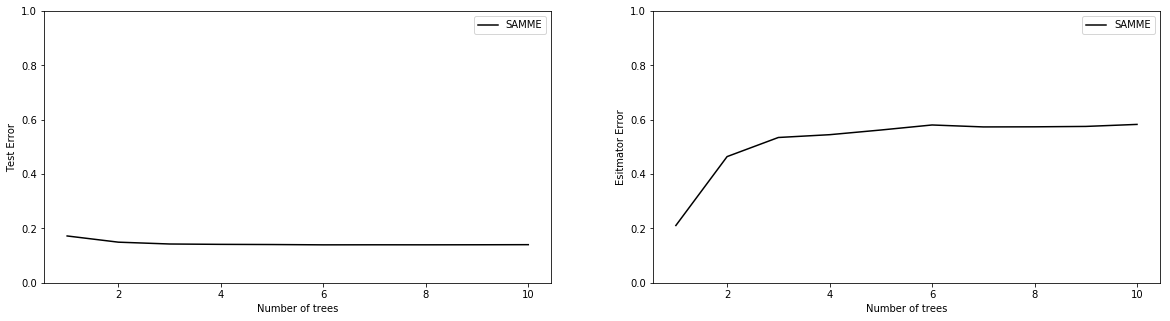

In [98]:
fig = plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(range(1, n_trees+1), test_errors, c='black', label='SAMME')
plt.legend()
plt.ylim(0.0, 1.0)
plt.ylabel('Test Error')
plt.xlabel('Number of trees')

plt.subplot(122)
plt.plot(range(1,n_trees+1), estimator_errors, c='black', label="SAMME")
plt.legend()
plt.ylim(0, 1.0)
plt.ylabel('Esitmator Error')
plt.xlabel('Number of trees')

fig

In [99]:
test_predictions = bdt.predict(test_events)
test_classes.loc[:,'PredClass'] = pd.Series(test_predictions, index=test_classes.index)
train_events, train_classes = prep_samples(bib[bib.EventNumber % test_EventMod != 0],
               multijet[multijet.EventNumber % test_EventMod != 0], 
               signal[signal.EventNumber % test_EventMod != 0],
               nEvents = per_sample_size)
train_predictions = bdt.predict(train_events)
train_classes.loc[:,'PredClass'] = pd.Series(train_predictions, index=train_classes.index)

calculate the signal of sqrt(B)

In [109]:
count_signal = len(test_classes[(test_classes.Class==2) & (test_classes.PredClass == 2)].index)
count_background = len(test_classes[(test_classes.Class==1) & (test_classes.PredClass == 2)].index) + len(test_classes[(test_classes.Class==0) & (test_classes.PredClass == 2)].index)
(count_signal, count_background, count_signal/sqrt(count_background))

(143460, 2903, 2662.608466203584)

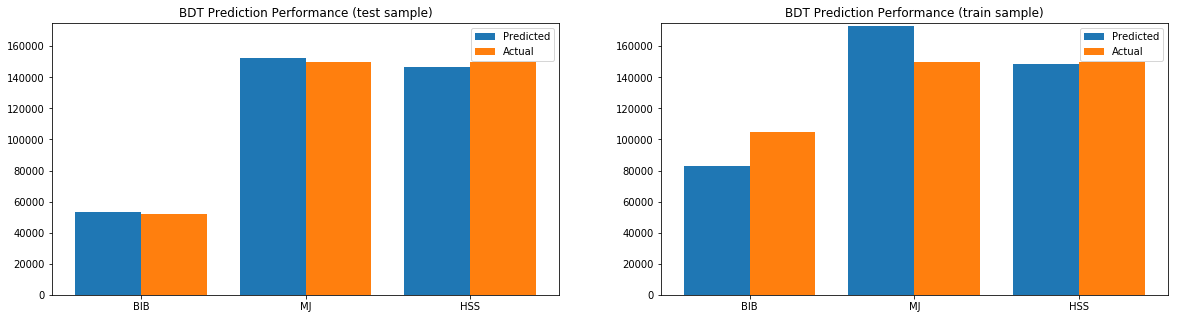

In [11]:
def plot_perf_generic(sp_info, train_info, title):
    ax = plt.subplot(sp_info)
    ax.set_ylim(0,175000)
    ax.hist([train_info.PredClass, train_info.Class], label=["Predicted", "Actual"], bins=[0,1,2,3])
    ax.set_xticks([0.5,1.5,2.5])
    ax.set_xticklabels(['BIB', 'MJ', 'HSS'])
    ax.set_title(title)
    ax.legend()

fig = plt.figure(figsize=(20,5))
plot_perf_generic(121, test_classes, "BDT Prediction Performance (test sample)")
plot_perf_generic(122, train_classes, "BDT Prediction Performance (train sample)")
fig

K:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


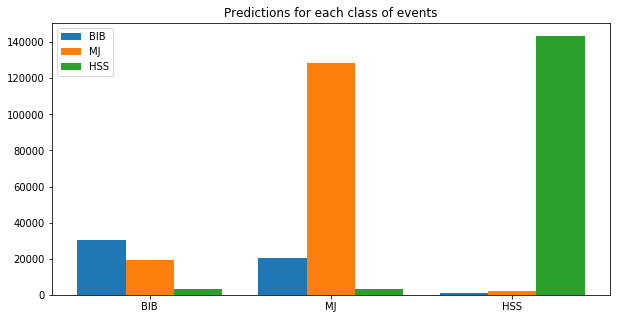

In [12]:
def plot_perf_for_class(sp_info, train_info):
    ax = plt.subplot(sp_info)
    
    bib = train_info[train_info.Class == 0]
    mj = train_info[train_info.Class == 1]
    hss = train_info[train_info.Class == 2]
    
    ax.hist([bib.PredClass, mj.PredClass, hss.PredClass], label=['BIB', 'MJ', 'HSS'], bins=[0,1,2,3])
    ax.set_xticks([0.5,1.5,2.5])
    ax.set_xticklabels(['BIB', 'MJ', 'HSS'])
    ax.legend()
    ax.set_title('Predictions for each class of events')

fig = plt.figure(figsize=(10,5))
plot_perf_for_class(111, test_classes)
fig

## Are all variables required?

Execute a training with each variable removed, one by one. Then evaluate and look at what the results are.

In [144]:
def quick_train (bib, multijet, signal, var_list):
    '''Shortcut to do a training over a particular var list
    
    Only training events should be passed in.
    
    Actual number of events used by teh training is taken from the global per_sample_size
    
    Args
        bib - the bib training sample
        multijet - the mj training sample
        signal - the signal training sample dataframe
        
    Returns
        bdt - The BDT result from the training
    '''
    return train_me(bib, multijet, signal,
                    nEvents = per_sample_size,
                    training_variable_list = var_list)

def calc_bdt_predictions (bib, multijet, signal, var_list, b):
    '''Given a BDT, determine its performance on a sample.
    
    The event samples are the standard testing ones.
    
    Args
        bib - the bib testing sample
        multijet - the mj testing sample
        signal - the signal testing sample
        var_list - list of variables we are looking at for this bdt
        b - the bdt determined earlier.
        
    Returns
        bibpf - the number of predicted (bib, mj, hss) events in the bib sample
        mjpf - the number of predicted (bib, mj, hss) events in the mj sample
        hsspf - the number of predicted (bib, mj, hss) events in the hss sample    
    '''
    test_events, test_classes = prep_samples(bib, multijet, signal,
                                             nEvents=per_sample_size,
                                             training_variable_list = var_list)
    
    test_predictions = b.predict(test_events)
    test_classes.loc[:,'PredClass'] = pd.Series(test_predictions, index=test_classes.index)

    bib = test_classes[test_classes.Class == 0]
    mj = test_classes[test_classes.Class == 1]
    hss = test_classes[test_classes.Class == 2]
    
    return [[len(e[e.PredClass == cIndex].index) for cIndex in (0, 1, 2)] for e in (bib, mj, hss)]

def unused_var(original_list, used_list):
    r = tuple(i for i in original_list if i not in used_list)
    r = r if len(r) != 0 else ('None',)
    return r

def calc_SSqrtB_Removed_Variables(bib, mj, sig, var_list, number_to_drop=1):
    '''Calculate the s/sqrt(b) for dropping variables.
    
    Standard event modulus is used to determine training and testing sample.
    
    Args
        bib - bib training and testing sample
        mj - mj training and testing sample
        sig - signal training and testing sample
        var_list - variable list to train against for full training
        number_to_drop - how many variable sto drop at a go
        
    Returns
        df - Data frame sorted by largest s/sqrt(b) to smallest, indexed by the names of the
             dropped variables.
    '''
    # Seperate the samples we will look at.
    training_bib = bib[bib.EventNumber % test_EventMod != 0]
    training_mj = mj[mj.EventNumber % test_EventMod != 0]
    training_sig = sig[sig.EventNumber % test_EventMod != 0]

    testing_bib = bib[bib.EventNumber % test_EventMod == 0]
    testing_mj = mj[mj.EventNumber % test_EventMod == 0]
    testing_sig = sig[sig.EventNumber % test_EventMod == 0]

    # The list of variables we want to look at will be the combintoric removal of number_to_drop. We add in the drop-nothing
    # option as well.
    var_training_list = itertools.combinations(var_list, len(var_list)-number_to_drop)
    var_training_list = list(var_training_list) + [tuple(var_list)]
    
    # Train each combination of training variables.
    bdt_list = {v1:quick_train(training_bib, training_mj, training_sig, v1) for v1 in var_training_list}

    # Next, determine the results in each case and pack them into a DataFrame
    per_var_counts = {unused_var(var_list,v1):calc_bdt_predictions(testing_bib, testing_mj, testing_sig, v1, bdt_list[v1]) for v1 in bdt_list}
    
    # Turn them into a dataframe, and add columns.
    r = pd.DataFrame(per_var_counts).T
    r.columns=['BIB', 'MJ', 'HSS']
    r.loc[:, 'BiBInHSS'] = pd.Series([b[2] for b in r.BIB], index=r.index)
    r.loc[:, 'MJInHSS'] = pd.Series([b[2] for b in r.MJ], index = r.index)
    r.loc[:, 'BackInHSS'] = pd.Series(r.MJInHSS+r.BiBInHSS, index = r.index)
    r.loc[:, 'HSSInHSS'] = pd.Series([b[2] for b in r.HSS], index = r.index)
    r.loc[:, 'SigOverSqrtB'] = pd.Series(r.HSSInHSS.divide(r.BackInHSS.apply(np.sqrt)), index = r.index)
    
    # Sort
    return r.sort_values(by='SigOverSqrtB')

In [147]:
%%time
remove_one_variable = calc_SSqrtB_Removed_Variables(bib, multijet, signal, default_training_variable_list)

Wall time: 36min 11s


In [148]:
remove_one_variable

,BIB,MJ,HSS,BiBInHSS,MJInHSS,BackInHSS,HSSInHSS,SigOverSqrtB
JetPt,"[28765, 21572, 1497]","[19175, 128405, 2420]","[2681, 5314, 142005]",1497,2420,3917,142005,2.269k
BIBDeltaTimingP,"[29010, 20687, 2137]","[20035, 128195, 1770]","[3661, 3437, 142902]",2137,1770,3907,142902,2.286k
BIBDeltaTimingM,"[28896, 21015, 1923]","[19220, 129017, 1763]","[3046, 3306, 143648]",1923,1763,3686,143648,2.366k
JetLat,"[30298, 20142, 1394]","[19969, 128081, 1950]","[2063, 3411, 144526]",1394,1950,3344,144526,2.499k
MaxTrackPt,"[30708, 19843, 1283]","[20324, 127783, 1893]","[3405, 3404, 143191]",1283,1893,3176,143191,2.541k
SumPtOfAllTracks,"[31007, 19564, 1263]","[20415, 127635, 1950]","[2149, 3403, 144448]",1263,1950,3213,144448,2.548k
EnergyDensity,"[30623, 19955, 1256]","[20247, 127848, 1905]","[2308, 3434, 144258]",1256,1905,3161,144258,2.566k
CalRatio,"[30653, 20136, 1045]","[20490, 127543, 1967]","[4139, 3600, 142261]",1045,1967,3012,142261,2.592k
ShowerCenter,"[30563, 20176, 1095]","[19780, 128289, 1931]","[2764, 3500, 143736]",1095,1931,3026,143736,2.613k
PredictedLxy,"[30886, 19628, 1320]","[20128, 128135, 1737]","[1994, 3452, 144554]",1320,1737,3057,144554,2.614k


We seem to gain the most s/sqrt(b) by removing PredictedLz. Lets see what happens when we repeat this process without it in there at all.

In [155]:
%%time
training_vars_removed_1 = list(set(default_training_variable_list) - set(["PredictedLz"]))
remove_two_variable = calc_SSqrtB_Removed_Variables(bib, multijet, signal, training_vars_removed_1)
remove_two_variable

Wall time: 32min 57s


In [157]:
remove_two_variable

,BIB,MJ,HSS,BiBInHSS,MJInHSS,BackInHSS,HSSInHSS,SigOverSqrtB
JetPt,"[28281, 22055, 1498]","[18802, 128521, 2677]","[3359, 5141, 141500]",1498,2677,4175,141500,2.190k
BIBDeltaTimingM,"[28833, 20641, 2360]","[20394, 127695, 1911]","[2691, 3397, 143912]",2360,1911,4271,143912,2.202k
BIBDeltaTimingP,"[29111, 20761, 1962]","[20299, 127852, 1849]","[3473, 3373, 143154]",1962,1849,3811,143154,2.319k
ShowerCenter,"[29767, 20414, 1653]","[20176, 128007, 1817]","[2165, 3274, 144561]",1653,1817,3470,144561,2.454k
PredictedLxy,"[29979, 20390, 1465]","[19291, 128892, 1817]","[3379, 3463, 143158]",1465,1817,3282,143158,2.499k
CalRatio,"[30671, 19991, 1172]","[20040, 127861, 2099]","[2946, 3514, 143540]",1172,2099,3271,143540,2.510k
JetLat,"[30843, 19873, 1118]","[20530, 127521, 1949]","[4799, 3366, 141835]",1118,1949,3067,141835,2.561k
EnergyDensity,"[29970, 20517, 1347]","[19361, 128853, 1786]","[3104, 3421, 143475]",1347,1786,3133,143475,2.563k
JetWidth,"[30430, 20236, 1168]","[20345, 127793, 1862]","[4459, 3563, 141978]",1168,1862,3030,141978,2.579k
JetLong,"[30865, 19795, 1174]","[19713, 128493, 1794]","[3735, 3522, 142743]",1174,1794,2968,142743,2.620k


In [158]:
training_vars_removed_2 = list(set(training_vars_removed_1) - set(["MaxTrackPt"]))
remove_three_variable = calc_SSqrtB_Removed_Variables(bib, multijet, signal, training_vars_removed_2)

In [159]:
remove_three_variable

,BIB,MJ,HSS,BiBInHSS,MJInHSS,BackInHSS,HSSInHSS,SigOverSqrtB
BIBDeltaTimingM,"[28476, 20820, 2538]","[20321, 127682, 1997]","[3042, 3313, 143645]",2538,1997,4535,143645,2.133k
JetPt,"[28125, 22016, 1693]","[18137, 129391, 2472]","[2565, 5240, 142195]",1693,2472,4165,142195,2.203k
BIBDeltaTimingP,"[28633, 20936, 2265]","[20223, 128045, 1732]","[2908, 3480, 143612]",2265,1732,3997,143612,2.272k
JetLat,"[30631, 19754, 1449]","[20149, 127883, 1968]","[2439, 3636, 143925]",1449,1968,3417,143925,2.462k
ShowerCenter,"[29931, 20583, 1320]","[19593, 128423, 1984]","[3722, 3351, 142927]",1320,1984,3304,142927,2.487k
SumPtOfAllTracks,"[31171, 19049, 1614]","[21725, 126531, 1744]","[2263, 3567, 144170]",1614,1744,3358,144170,2.488k
PredictedLxy,"[30560, 19874, 1400]","[20260, 127992, 1748]","[4008, 3568, 142424]",1400,1748,3148,142424,2.538k
EnergyDensity,"[29923, 20589, 1322]","[19180, 128941, 1879]","[2405, 3433, 144162]",1322,1879,3201,144162,2.548k
JetWidth,"[30540, 20133, 1161]","[19796, 128241, 1963]","[3102, 3588, 143310]",1161,1963,3124,143310,2.564k
CalRatio,"[30631, 20180, 1023]","[19394, 128510, 2096]","[3076, 3632, 143292]",1023,2096,3119,143292,2.566k


In [160]:
training_vars_removed_2

['BIBDeltaTimingM',
 'CalRatio',
 'SumPtOfAllTracks',
 'FirstClusterRadius',
 'EnergyDensity',
 'JetLat',
 'BIBDeltaTimingP',
 'PredictedLxy',
 'JetLong',
 'JetPt',
 'NTracks',
 'HadronicLayer1Fraction',
 'JetWidth',
 'ShowerCenter']